In [1]:
import praw

# Step 1: Authenticate with Reddit
reddit = praw.Reddit(
    client_id="2br9WYIk4kPbyKYN0HPoyg",
    client_secret="rVp-xBLofl10MaMkb2QM-PTCgTx5ZA",
    user_agent="Sentiments Analysis"
)

# Step 2: Get the Reddit post
post_url = "https://www.reddit.com/r/law/comments/1gqmti0/trump_taps_rep_matt_gaetz_as_attorney_general/"
submission = reddit.submission(url=post_url)

# Step 3: Extract the topic (post title) and all comments
post_title = submission.title
comments = []

# Collecting comments recursively (up to two levels of replies by default)
submission.comments.replace_more(limit=None)
for top_level_comment in submission.comments:
    comments.append(top_level_comment.body)
    for reply in top_level_comment.replies:
        comments.append(reply.body)

# Display results
print("Post Title:", post_title)
print("Comments:", comments)

Post Title: Trump taps Rep. Matt Gaetz as attorney general
Comments: ['i have more legal experience than the potential next attorney general of the united states (i am also not an alleged child trafficker). dear god', "At this point I'm waiting for him to appoint Andrew Tate to the Interagency Task Force on Human Trafficking.\n\nEdit: It'd be fun (laugh so we don't cry) to go through this link [https://en.wikipedia.org/wiki/List\\_of\\_positions\\_filled\\_by\\_presidential\\_appointment\\_with\\_Senate\\_confirmation](https://en.wikipedia.org/wiki/List_of_positions_filled_by_presidential_appointment_with_Senate_confirmation)  and pick any position you want, and the person least suited to fill it. There's a LOT of room there for some entertainment.", 'Well, he knows how to fuck minors without being charged. I‘d call that some next level legal experience', 'The job of the next AG is to do as Trump says. Investigate and charge people that displease him and ignore crimes of those who do p

In [2]:
import pandas as pd

# Organize data into a DataFrame
df = pd.DataFrame({
    "comment": comments
})

# Save to a CSV file if needed
df.to_csv("reddit_comments1.csv", index=False)

# Display the first few comments
df.head()

,comment
0,i have more legal experience than the potentia...
1,At this point I'm waiting for him to appoint A...
2,"Well, he knows how to fuck minors without bein..."
3,The job of the next AG is to do as Trump says....
4,I have more legal experience than the potentia...


In [3]:
# DATA CLEANING PROCESS

import re

# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)     # Remove mentions
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip extra whitespace
    return text

# Apply the function to each comment
df["cleaned_comment"] = df["comment"].apply(clean_text)
print(df[["comment", "cleaned_comment"]].head())


                                             comment  \
0  i have more legal experience than the potentia...   
1  At this point I'm waiting for him to appoint A...   
2  Well, he knows how to fuck minors without bein...   
3  The job of the next AG is to do as Trump says....   
4  I have more legal experience than the potentia...   

                                     cleaned_comment  
0  i have more legal experience than the potentia...  
1  at this point im waiting for him to appoint an...  
2  well he knows how to fuck minors without being...  
3  the job of the next ag is to do as trump says ...  
4  i have more legal experience than the potentia...  


In [4]:
df.head()

,comment,cleaned_comment
0,i have more legal experience than the potentia...,i have more legal experience than the potentia...
1,At this point I'm waiting for him to appoint A...,at this point im waiting for him to appoint an...
2,"Well, he knows how to fuck minors without bein...",well he knows how to fuck minors without being...
3,The job of the next AG is to do as Trump says....,the job of the next ag is to do as trump says ...
4,I have more legal experience than the potentia...,i have more legal experience than the potentia...


In [5]:
from textblob import TextBlob
!pip install textblob

# Function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Range from -1 (negative) to +1 (positive)
    return sentiment

# Apply sentiment analysis
df["sentiment"] = df["cleaned_comment"].apply(get_sentiment)

# Inspect the results
print(df[["cleaned_comment", "sentiment"]].head())


                                     cleaned_comment  sentiment
0  i have more legal experience than the potentia...   0.108333
1  at this point im waiting for him to appoint an...   0.075000
2  well he knows how to fuck minors without being...  -0.066667
3  the job of the next ag is to do as trump says ...   0.086667
4  i have more legal experience than the potentia...   0.020536


In [6]:
def classify_sentiment(polarity):
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Classify sentiment
df["sentiment_class"] = df["sentiment"].apply(classify_sentiment)
print(df[["cleaned_comment", "sentiment", "sentiment_class"]].head())


                                     cleaned_comment  sentiment  \
0  i have more legal experience than the potentia...   0.108333   
1  at this point im waiting for him to appoint an...   0.075000   
2  well he knows how to fuck minors without being...  -0.066667   
3  the job of the next ag is to do as trump says ...   0.086667   
4  i have more legal experience than the potentia...   0.020536   

  sentiment_class  
0        Positive  
1         Neutral  
2         Neutral  
3         Neutral  
4         Neutral  


In [7]:
df.head(100)

,comment,cleaned_comment,sentiment,sentiment_class
0,i have more legal experience than the potentia...,i have more legal experience than the potentia...,0.108333,Positive
1,At this point I'm waiting for him to appoint A...,at this point im waiting for him to appoint an...,0.075000,Neutral
2,"Well, he knows how to fuck minors without bein...",well he knows how to fuck minors without being...,-0.066667,Neutral
3,The job of the next AG is to do as Trump says....,the job of the next ag is to do as trump says ...,0.086667,Neutral
4,I have more legal experience than the potentia...,i have more legal experience than the potentia...,0.020536,Neutral
...,...,...,...,...
95,It's the same exact game plan as 4 years ago.\...,its the same exact game plan as years ago\n\n...,-0.055357,Neutral
96,"They're completely unafraid of the optics now,...",theyre completely unafraid of the optics now a...,0.250000,Positive
97,"I laughed, cried and died all in the same 30 s...",i laughed cried and died all in the same seco...,0.033333,Neutral
98,The Onion is fuming Trump stole their satirica...,the onion is fuming trump stole their satirica...,0.000000,Neutral


In [8]:
print(df["sentiment_class"].value_counts())

Neutral     324
Positive    210
Negative    111
Name: sentiment_class, dtype: int64


In [9]:
df.to_csv("reddit_comments_with_sentiment.csv", index=False)

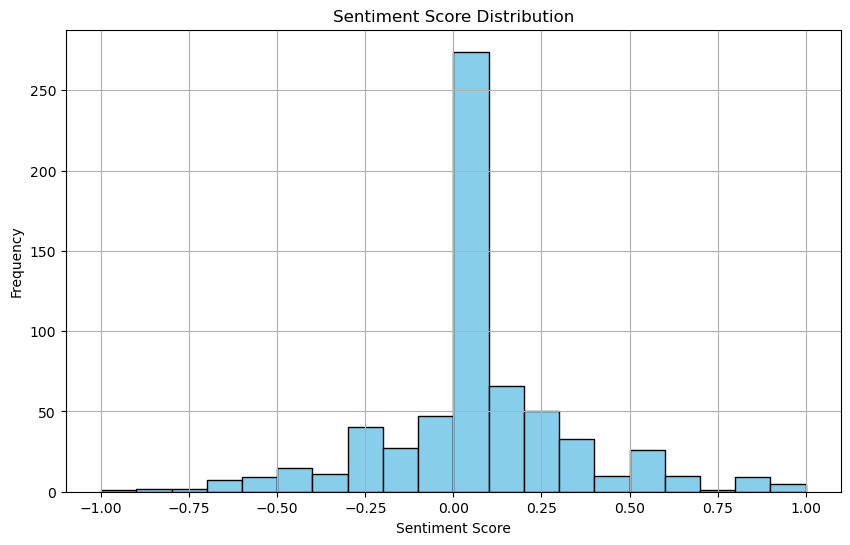

In [10]:
import matplotlib.pyplot as plt

# Plot a histogram of sentiment scores
plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


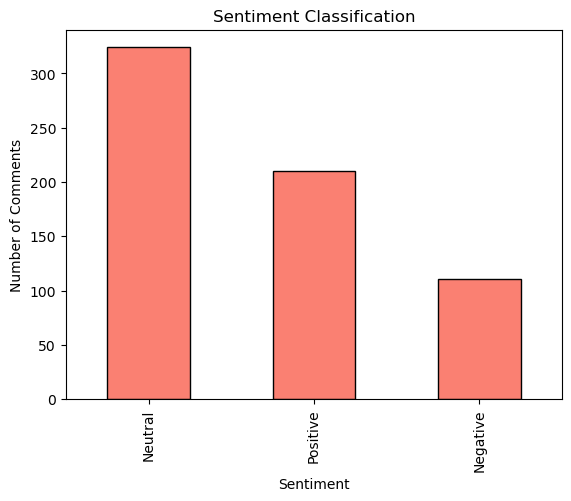

In [11]:
df['sentiment_class'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Sentiment Classification')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

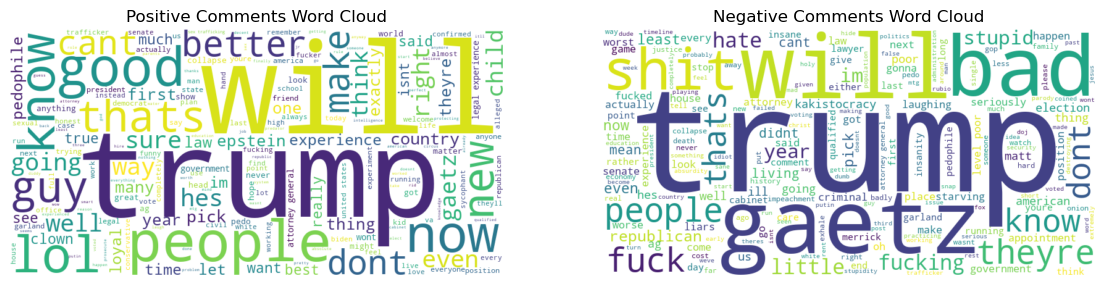

In [17]:
from wordcloud import WordCloud

# Separate positive and negative comments
positive_comments = " ".join(df[df["sentiment_class"] == "Positive"]["cleaned_comment"])
negative_comments = " ".join(df[df["sentiment_class"] == "Negative"]["cleaned_comment"])

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_comments)
wordcloud_neg = WordCloud(width=800, height=400, background_color="white").generate(negative_comments)

# Plot word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Comments Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Comments Word Cloud")

plt.show()

In [18]:
df.to_csv("reddit_comments_with_sentiment_analysis.csv", index=False)